In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.cm as cm
##
rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
%matplotlib inline

In [3]:
from scipy.integrate import solve_ivp

In [4]:
def fun(t,y):
    return [y[1],-k**2*y[0]]

In [5]:
k=1
t_span=[0,1]  #For L=1
y0=[0,-0.1]
sol=solve_ivp(fun,t_span,y0,t_eval=np.linspace(t_span[0],t_span[1],100))

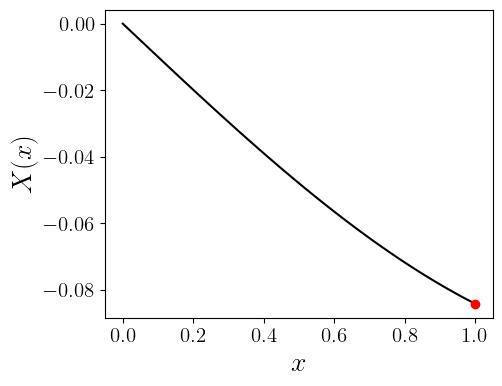

In [6]:
plt.figure(figsize=(5,4))
plt.plot(sol.t,sol.y[0],'k')
plt.plot(sol.t[-1],sol.y[0][-1],'ro')
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel(r'$x$',size=20)
plt.ylabel(r'$X(x)$',size=20)
plt.show()

In [9]:
K_list=np.arange(0.1,20,0.1)
U_list=np.arange(0,1,0.01)

In [10]:
A,B = np.meshgrid(K_list,U_list)
Shoot_Sol = np.zeros(A.shape)

In [11]:
Shoot_Sol

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

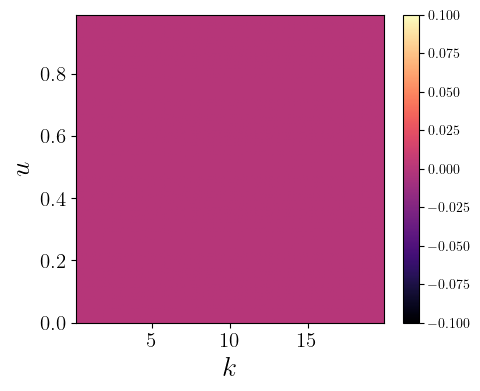

In [12]:
plt.figure(figsize=(5,4))
plt.imshow(Shoot_Sol,extent=(min(K_list),max(K_list),min(U_list),max(U_list)),aspect=20,cmap=cm.magma,origin='lower')
plt.colorbar()
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel(r'$k$',size=20)
plt.ylabel(r'$u$',size=20)
plt.show()

In [13]:
def G(u,k):
    t_span=[0,1]
    y0=[0,u]
    sol=solve_ivp(fun,t_span,y0,t_eval=np.linspace(t_span[0],t_span[1],100))
    return sol.y[0][-1]

In [14]:
for i in range(len(U_list)):
    for j in range(len(K_list)):
        u=U_list[i]
        k=K_list[j]
        Shoot_Sol[i][j]=G(u,k)

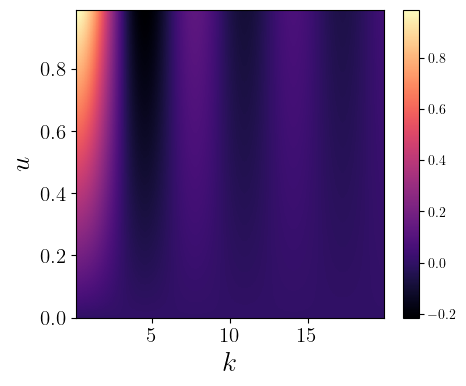

In [15]:
plt.figure(figsize=(5,4))
plt.imshow(Shoot_Sol,extent=(min(K_list),max(K_list),min(U_list),max(U_list)),aspect=20,cmap=cm.magma,origin='lower')
plt.colorbar()
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel(r'$k$',size=20)
plt.ylabel(r'$u$',size=20)
plt.show()

In [17]:
epsilon=0.001

Zeros_k=[]
Zeros_u=[]
for i in range(len(U_list)):
    for j in range(len(K_list)):
        if abs(Shoot_Sol[i][j])<=epsilon:
            u=U_list[i]
            k=K_list[j]
            Zeros_k.append(k)
            Zeros_u.append(u)

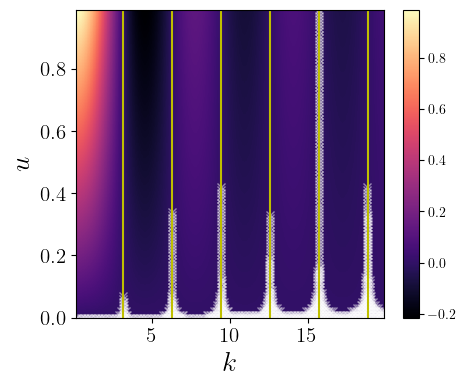

In [19]:
plt.figure(figsize=(5,4))
plt.imshow(Shoot_Sol,extent=(min(K_list),max(K_list),min(U_list),max(U_list)),aspect=20,cmap=cm.magma,origin='lower')
plt.plot(Zeros_k,Zeros_u,'wx',alpha=0.5)
for n in range(1,7):
    plt.axvline(x=n*np.pi,color='y')
plt.colorbar()
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel(r'$k$',size=20)
plt.ylabel(r'$u$',size=20)
plt.show()